### **Importing the Libraries**


In [8]:
import pandas as pd

import numpy as np

import pickle

import matplotlib.pyplot as plt

%matplotlib inline

import seaborn as sns

import sklearn

from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier

from sklearn.neighbors import KNeighborsClassifier

from sklearn.model_selection import RandomizedSearchCV

import imblearn

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score

In [9]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## **Read the Dataset**

In [10]:
data = pd.read_csv('/content/drive/MyDrive/Project/Dataset.csv')
data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [11]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## **Handling Missing Values**

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [13]:
data.isnull().sum()

,0
Loan_ID,0
Gender,13
Married,3
Dependents,15
Education,0
Self_Employed,32
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,22
Loan_Amount_Term,14


In [14]:
data.isnull().sum()

,0
Loan_ID,0
Gender,13
Married,3
Dependents,15
Education,0
Self_Employed,32
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,22
Loan_Amount_Term,14


In [15]:
data['Credit_History'] = data['Credit_History'].fillna(data['Credit_History'].median())
data['Self_Employed'] = data['Self_Employed'].fillna(data['Self_Employed'].mode()[0])
data['Dependents'] = data['Dependents'].str.replace('+','')
data['LoanAmount'] = data['LoanAmount'].fillna(data['LoanAmount'].mode()[0])
data['Loan_Amount_Term'] = data['Loan_Amount_Term'].fillna(data['Loan_Amount_Term'].mode()[0])
data['Dependents'] = data['Dependents'].fillna(data['Dependents'].mode()[0])
data['Gender'] = data['Gender'].fillna(data['Gender'].mode()[0])
data['Married'] = data['Married'].fillna(data['Married'].mode()[0])

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             614 non-null    object 
 2   Married            614 non-null    object 
 3   Dependents         614 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      614 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         614 non-null    float64
 9   Loan_Amount_Term   614 non-null    float64
 10  Credit_History     614 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [17]:
obj_col=data.select_dtypes('object').columns
obj_col

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [18]:
from sklearn.preprocessing import OrdinalEncoder
oe=OrdinalEncoder()
data[obj_col]=oe.fit_transform(data[obj_col])
data.head(3)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0.0,1.0,0.0,0.0,0.0,0.0,5849,0.0,120.0,360.0,1.0,2.0,1.0
1,1.0,1.0,1.0,1.0,0.0,0.0,4583,1508.0,128.0,360.0,1.0,0.0,0.0
2,2.0,1.0,1.0,0.0,0.0,1.0,3000,0.0,66.0,360.0,1.0,2.0,1.0


## **Handling Categorical Values**

In [19]:
data["Gender"]=data["Gender"].astype("int64")
data["Married"]=data["Married"].astype("int64")
data["Self_Employed"]=data["Self_Employed"].astype("int64")
data["Credit_History"]=data["Credit_History"].astype("int64")
data["LoanAmount"]=data["LoanAmount"].astype("int64")
data["Loan_Amount_Term"]=data["Loan_Amount_Term"].astype("int64")
data["Education"]=data[ "Education"].astype("int64")
data["CoapplicantIncome"]=data["CoapplicantIncome"].astype("int64")

In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    float64
 1   Gender             614 non-null    int64  
 2   Married            614 non-null    int64  
 3   Dependents         614 non-null    float64
 4   Education          614 non-null    int64  
 5   Self_Employed      614 non-null    int64  
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    int64  
 8   LoanAmount         614 non-null    int64  
 9   Loan_Amount_Term   614 non-null    int64  
 10  Credit_History     614 non-null    int64  
 11  Property_Area      614 non-null    float64
 12  Loan_Status        614 non-null    float64
dtypes: float64(4), int64(9)
memory usage: 62.5 KB


## **Handling Imbalance Data**

In [21]:
from imblearn.combine import*

In [22]:
SEED=2021
smote = SMOTETomek (random_state=SEED)

In [23]:
y=data['Loan_Status']
x=data.drop(columns=['Loan_Status'], axis=1)

In [24]:
x_bal,y_bal=smote.fit_resample(x,y)

In [25]:
print(y.value_counts())
print(y_bal.value_counts())

Loan_Status
1.0    422
0.0    192
Name: count, dtype: int64
Loan_Status
1.0    366
0.0    366
Name: count, dtype: int64


## **Descriptive Statistical**

In [26]:
data.describe()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.00000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,306.500000,0.817590,0.653094,0.744300,0.218241,0.133550,5403.459283,1621.24430,145.465798,342.410423,0.855049,1.037459,0.687296
std,177.390811,0.386497,0.476373,1.009623,0.413389,0.340446,6109.041673,2926.24876,84.180967,64.428629,0.352339,0.787482,0.463973
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,150.000000,0.00000,9.000000,12.000000,0.000000,0.000000,0.000000
25%,153.250000,1.000000,0.000000,0.000000,0.000000,0.000000,2877.500000,0.00000,100.250000,360.000000,1.000000,0.000000,0.000000
50%,306.500000,1.000000,1.000000,0.000000,0.000000,0.000000,3812.500000,1188.50000,125.000000,360.000000,1.000000,1.000000,1.000000
75%,459.750000,1.000000,1.000000,1.000000,0.000000,0.000000,5795.000000,2297.25000,164.750000,360.000000,1.000000,2.000000,1.000000
max,613.000000,1.000000,1.000000,3.000000,1.000000,1.000000,81000.000000,41667.00000,700.000000,480.000000,1.000000,2.000000,1.000000


## **Univariate Analysis**

<ipython-input-27-28d1357886bf>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['ApplicantIncome'],color='r')
<ipython-input-27-28d1357886bf>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Credit_History'])


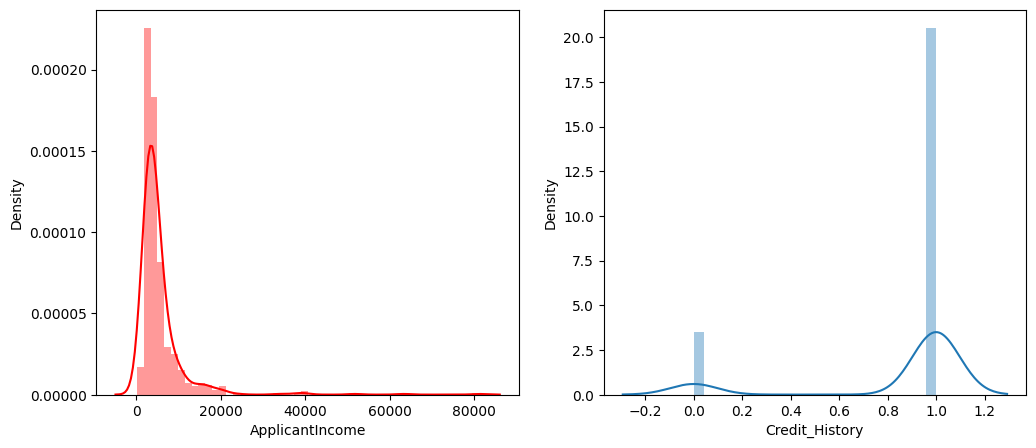

In [27]:
plt.figure(figsize=(12,5))
plt.subplot(121)
sns.distplot(data['ApplicantIncome'],color='r')
plt.subplot(122)
sns.distplot(data['Credit_History'])
plt.show()

## **Bivariate Analysis**

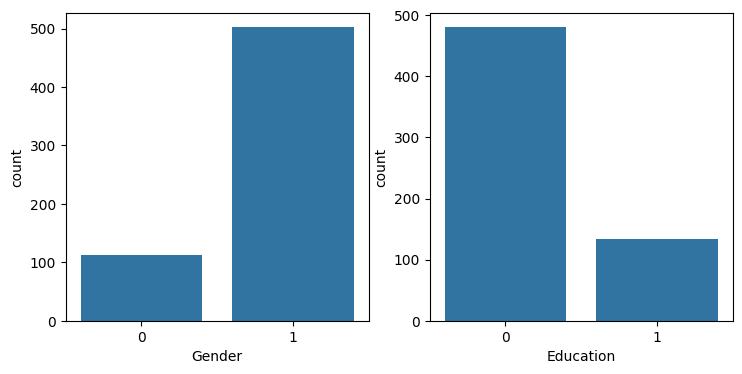

In [28]:
plt.figure(figsize=(18,4))
plt.subplot(1,4,1)
sns.countplot(x=data['Gender'])
plt.subplot(1,4,2)
sns.countplot(x=data['Education'])
plt.show()

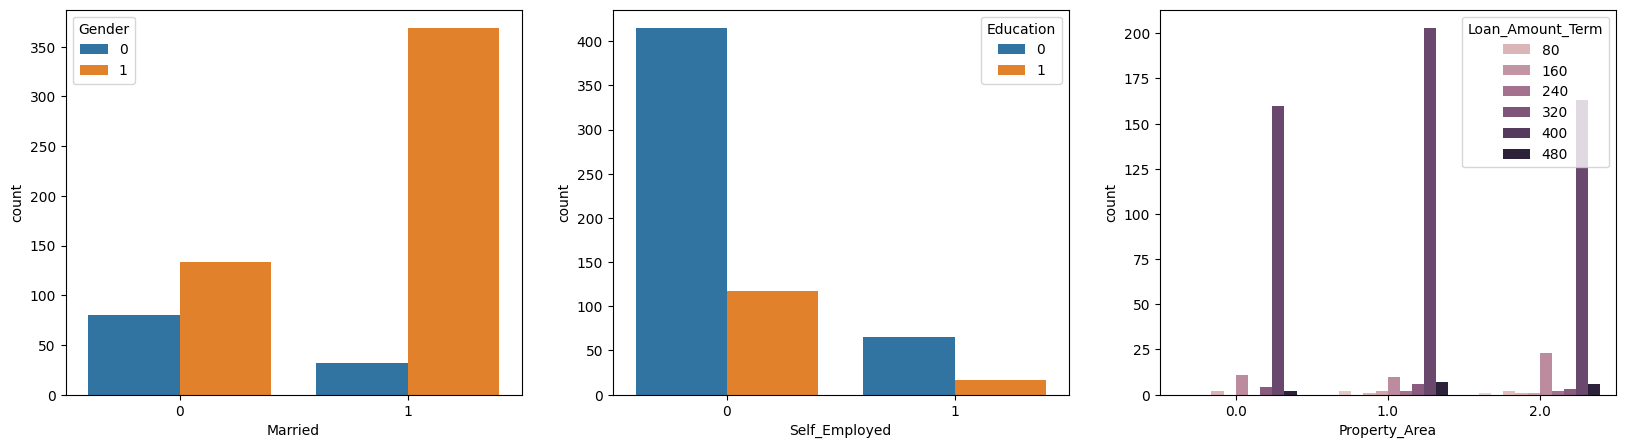

In [29]:

plt.figure(figsize=(20,5))
plt.subplot(131)
sns.countplot(x=data['Married'],hue=data['Gender'])
plt.subplot(132)
sns.countplot(x=data['Self_Employed'],hue=data['Education'])
plt.subplot(133)
sns.countplot(x=data['Property_Area'],hue=data['Loan_Amount_Term'])
plt.show()

## **Multivariate Analysis**

/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:3399: UserWarning: 45.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<Axes: xlabel='Gender', ylabel='ApplicantIncome'>

/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:3399: UserWarning: 25.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:3399: UserWarning: 61.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


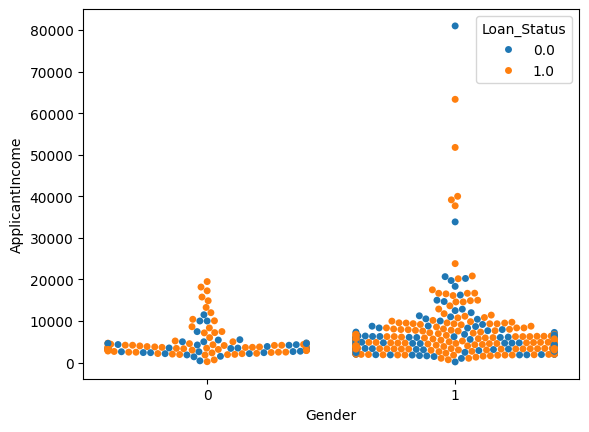

In [30]:
sns.swarmplot(x=data['Gender'],y=data['ApplicantIncome'], hue=data['Loan_Status'])

## **Scaling the Data**

In [31]:
names = x.columns
sc=StandardScaler()
x_bal=sc.fit_transform(x_bal)
x_bal=pd.DataFrame(x_bal,columns=names)

## **Splitting data into Train and Test**

In [32]:
X_train, X_test, Y_train, Y_test = train_test_split(x_bal, y_bal, test_size=0.2, random_state=42)

## **Xgboost Model**

In [33]:
models = []
models.append(('K Nearest Neighbors', KNeighborsClassifier()))
models.append(('Decision Tree', DecisionTreeClassifier()))
models.append(('XGBoost',GradientBoostingClassifier()))
models.append(('Random Forest', RandomForestClassifier()))

In [34]:
for name, algorithm in models:
    model=algorithm
    model.fit(X_train, Y_train)
    prediction = model.predict(X_test)
    print('\n Algorithm is:',name)
    print('The accuracy is %f:'%(accuracy_score(prediction,Y_test)))
    print('The Confusion Matrix is:',(confusion_matrix(Y_test,prediction)))
    print('The Classification Report is :', (name, classification_report(Y_test,prediction)))
print('\n')


 Algorithm is: K Nearest Neighbors
The accuracy is 0.707483:
The Confusion Matrix is: [[43 28]
 [15 61]]
The Classification Report is : ('K Nearest Neighbors', '              precision    recall  f1-score   support\n\n         0.0       0.74      0.61      0.67        71\n         1.0       0.69      0.80      0.74        76\n\n    accuracy                           0.71       147\n   macro avg       0.71      0.70      0.70       147\nweighted avg       0.71      0.71      0.70       147\n')

 Algorithm is: Decision Tree
The accuracy is 0.809524:
The Confusion Matrix is: [[59 12]
 [16 60]]
The Classification Report is : ('Decision Tree', '              precision    recall  f1-score   support\n\n         0.0       0.79      0.83      0.81        71\n         1.0       0.83      0.79      0.81        76\n\n    accuracy                           0.81       147\n   macro avg       0.81      0.81      0.81       147\nweighted avg       0.81      0.81      0.81       147\n')

 Algorithm is

## **ANN Model**

In [42]:
import tensorflow as tf
from tensorflow.python import keras
from keras import layers
from keras.layers import Activation,Dense

classifier=tf.keras.Sequential()
# Change input_dim from 11 to 12 to match the number of features in X_train
classifier.add(Dense(units=100, activation='relu', input_dim=12))
classifier.add(Dense (units=50, activation='relu'))
classifier.add(Dense(units=1, activation='sigmoid'))
classifier.compile(optimizer='adam',loss='binary_crossentropy', metrics=['accuracy'])

In [43]:
model_history = classifier.fit(X_train, Y_train, batch_size=100, validation_split=0.2, epochs=100)

Epoch 1/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 68ms/step - accuracy: 0.5125 - loss: 0.7173 - val_accuracy: 0.6923 - val_loss: 0.6529
Epoch 2/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.6451 - loss: 0.6612 - val_accuracy: 0.7692 - val_loss: 0.6209
Epoch 3/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.7601 - loss: 0.6135 - val_accuracy: 0.7521 - val_loss: 0.5900
Epoch 4/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.8103 - loss: 0.5714 - val_accuracy: 0.7949 - val_loss: 0.5546
Epoch 5/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.8063 - loss: 0.5438 - val_accuracy: 0.7949 - val_loss: 0.5206
Epoch 6/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.8152 - loss: 0.5042 - val_accuracy: 0.8034 - val_loss: 0.4897
Epoch 7/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.8250 - loss: 0.4736 - val_accuracy: 0.8205 - val_loss: 0.4659
Epoch 8/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.8004 - loss: 0.4747 - val_accuracy: 0.8120 - val_loss:

## **Testing the Model**

In [44]:
print("Evaluate model on test data")
results = classifier.evaluate(X_test, Y_test, batch_size=128)
print("test loss, test acc:", results)

# Generate a prediction using model.predict()
# and calculate it's shape:
print("Generate a prediction")
prediction = classifier.predict(X_test[:1])
print("prediction shape:", prediction.shape)

Evaluate model on test data
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.7301 - loss: 0.9273
test loss, test acc: [0.9316714406013489, 0.7278911471366882]
Generate a prediction
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
prediction shape: (1, 1)


In [45]:
#classifier.save("loan.h5")
y_pred=classifier.predict(X_test)
y_pred

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


array([[2.4761446e-03],
       [6.9023478e-01],
       [5.4518658e-01],
       [9.3478316e-01],
       [4.1603195e-03],
       [7.0850376e-07],
       [8.9009744e-01],
       [7.2598183e-01],
       [4.4517346e-06],
       [9.7768360e-01],
       [1.4000077e-02],
       [6.7628193e-01],
       [4.6930367e-01],
       [8.9948249e-01],
       [4.5843961e-05],
       [9.8661357e-01],
       [9.4449604e-01],
       [3.6786063e-05],
       [5.8606285e-01],
       [7.4296677e-01],
       [5.1238406e-01],
       [9.2774771e-06],
       [3.7882961e-05],
       [5.8737665e-01],
       [3.8411199e-06],
       [9.8323886e-05],
       [9.9148399e-01],
       [6.8122667e-06],
       [3.7992632e-01],
       [3.8362850e-05],
       [8.9906639e-01],
       [8.0851126e-01],
       [7.7133578e-01],
       [1.7410895e-05],
       [6.3942917e-02],
       [8.5729134e-01],
       [4.5539735e-05],
       [1.8646258e-04],
       [3.8597903e-03],
       [8.4056622e-01],
       [1.7291838e-02],
       [9.985846

In [46]:
y_pred=(y_pred>0.5)
y_pred

array([[False],
       [ True],
       [ True],
       [ True],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [ True],
       [ True],
       [False],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [

In [47]:
def predict_x(sample):
  sample=np.array(sample)
  sample=sample.reshape(1,-1)
  sample=sc.transform(sample)
  return classifier.predict(sample)

In [49]:
data1=data.drop('Loan_ID',axis=1)
sample=data1.sample()
sample

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
586,1,1,0.0,0,0,2297,1522,104,360,1,2.0,1.0


In [50]:
#sample=[[1,1,0,1,1,4276,1542,145,240,0,1]]
if predict_x(sample)>0.5:
  print('Prediction: High chance of Loan approval')
else:
  print('Prediction: Low chance of Loan approval')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
Prediction: Low chance of Loan approval


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


## **Compare the Model**

In [51]:
XGB=models[0]
KNN=models[1]
DT=models[2]
RF=models[3]

In [52]:
def compareModel(models):
  for name, algorithm in models:
    model=algorithm
    model.fit(X_train, Y_train)
    prediction = model.predict(X_test)
    print('\n Algorithm is:',name)
    print('The accuracy is %f:'%(accuracy_score(prediction,Y_test)))
    print('The Confusion Matrix is:\n',(confusion_matrix(Y_test,prediction)))
    print('The Classification Report is :\n',classification_report(Y_test,prediction))
    print('-'*100)

In [53]:
compareModel(models)


 Algorithm is: K Nearest Neighbors
The accuracy is 0.707483:
The Confusion Matrix is:
 [[43 28]
 [15 61]]
The Classification Report is :
               precision    recall  f1-score   support

         0.0       0.74      0.61      0.67        71
         1.0       0.69      0.80      0.74        76

    accuracy                           0.71       147
   macro avg       0.71      0.70      0.70       147
weighted avg       0.71      0.71      0.70       147

----------------------------------------------------------------------------------------------------

 Algorithm is: Decision Tree
The accuracy is 0.775510:
The Confusion Matrix is:
 [[56 15]
 [18 58]]
The Classification Report is :
               precision    recall  f1-score   support

         0.0       0.76      0.79      0.77        71
         1.0       0.79      0.76      0.78        76

    accuracy                           0.78       147
   macro avg       0.78      0.78      0.78       147
weighted avg       0.78     

In [54]:
yPred = classifier.predict(X_test)
print(accuracy_score(y_pred,Y_test))
print("ANN Model")
print("Confusion_Matrix")
print(confusion_matrix(Y_test,y_pred))
print("Classification Report")
print(classification_report(Y_test,y_pred))

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
0.7278911564625851
ANN Model
Confusion_Matrix
[[49 22]
 [18 58]]
Classification Report
              precision    recall  f1-score   support

         0.0       0.73      0.69      0.71        71
         1.0       0.72      0.76      0.74        76

    accuracy                           0.73       147
   macro avg       0.73      0.73      0.73       147
weighted avg       0.73      0.73      0.73       147



In [55]:

from sklearn.model_selection import cross_val_score
rf = RandomForestClassifier()
rf.fit(X_train,Y_train)
yPred = rf.predict(X_test)

In [56]:
f1_score (yPred,Y_test, average='weighted')

0.8517721535143138

In [60]:
cv = cross_val_score(rf,x,y,cv=5)
np.mean(cv)

np.float64(0.7703052112488338)